In [1]:
from lightkurve import search_targetpixelfile, TessTargetPixelFile
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

## Look at a star that is confirmed to have a planet

<Axes: title={'center': 'Target ID: 6922244, Cadence: 11958'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

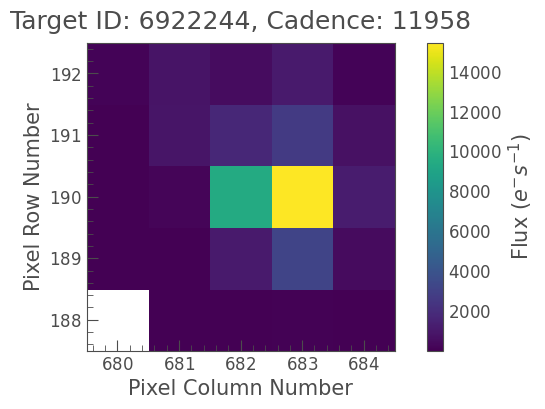

In [2]:
pixelfile = search_targetpixelfile('KIC 6922244', author='Kepler', cadence='long', quarter=4).download()
pixelfile.plot(frame=42)

3.522652265226523 d
353.60132485035285
0.1 d


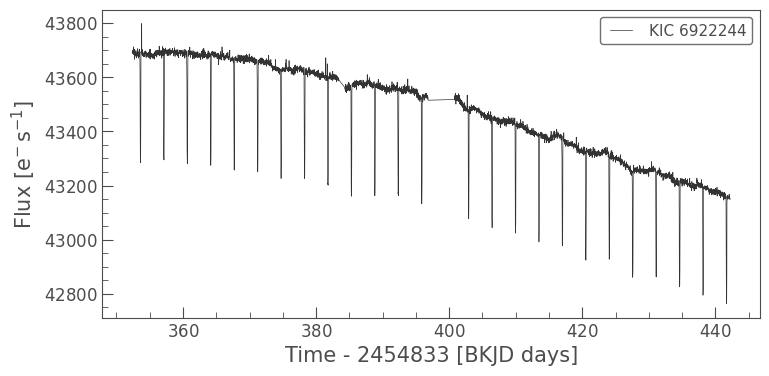

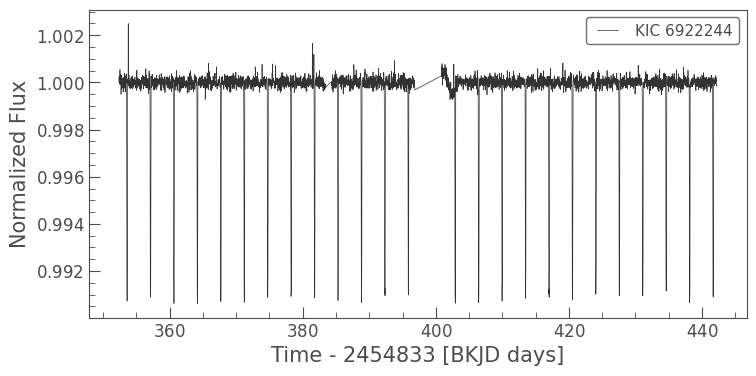

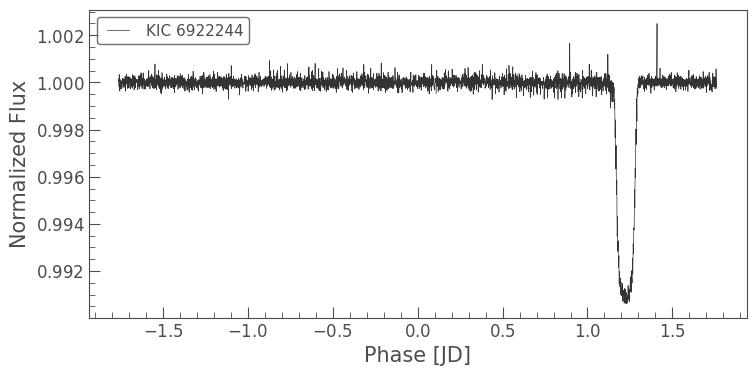

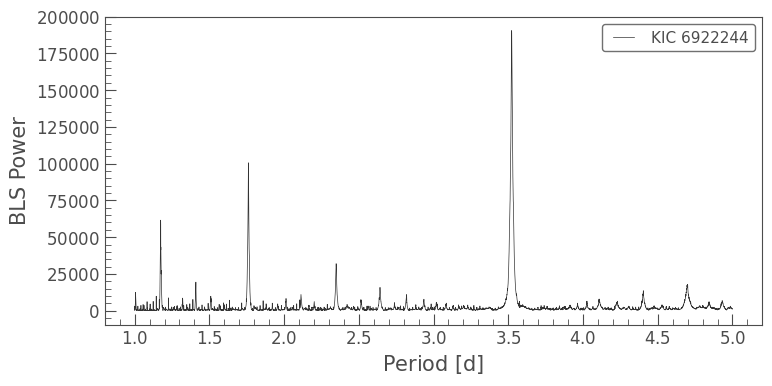

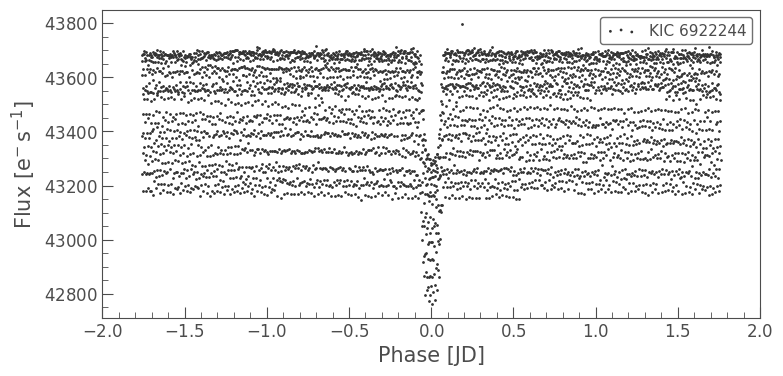

In [3]:
lc = pixelfile.to_lightcurve(aperture_mask=pixelfile.pipeline_mask)
lc.plot()

flat_lc = lc.flatten()
flat_lc.plot()

folded_lc = flat_lc.fold(period = 3.5227)
folded_lc.plot()

period = np.linspace(1,5,10000)

bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

ax = lc.fold(period=planet_x_period, epoch_time = planet_x_t0).scatter()
ax.set_xlim(-2,2)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)
plt.show()

## Now Lets Look at a Couple of New Stars

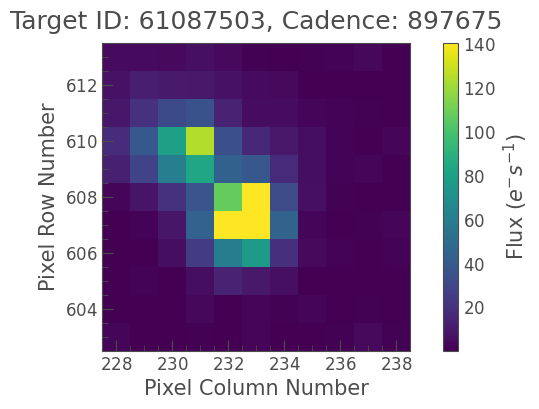

In [4]:
tpf = TessTargetPixelFile('TESS/MAST_2024-06-03T1410/TESS/tess2021258175143-s0043-0000000061087503-0214-s/tess2021258175143-s0043-0000000061087503-0214-s_tp.fits')
tpf.plot(frame=42)
plt.show()

In [5]:
def find_spikes(tpf):
    lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
    lc.plot()
    
    flat_lc = lc.flatten()
    flat_lc.plot()
    
    plt.show()
    return flat_lc

In [6]:
def look_for_planet(lc, start, end):
    
    period = np.linspace(start,end,10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
    bls.plot()
    
    planet_x_period = bls.period_at_max_power
    planet_x_t0 = bls.transit_time_at_max_power
    planet_x_dur = bls.duration_at_max_power
    
    ax = lc.fold(period=planet_x_period, epoch_time = planet_x_t0).scatter()
    ax.set_xlim(-2,2)
    
    print(f"Detected Period: {planet_x_period}")
    print(f"Transit Time (Epoch): {planet_x_t0}")
    print(f"Duration: {planet_x_dur}")
    plt.show()
    return bls

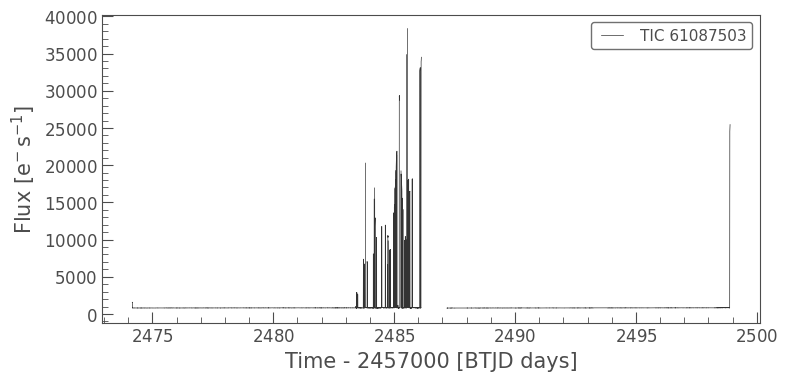

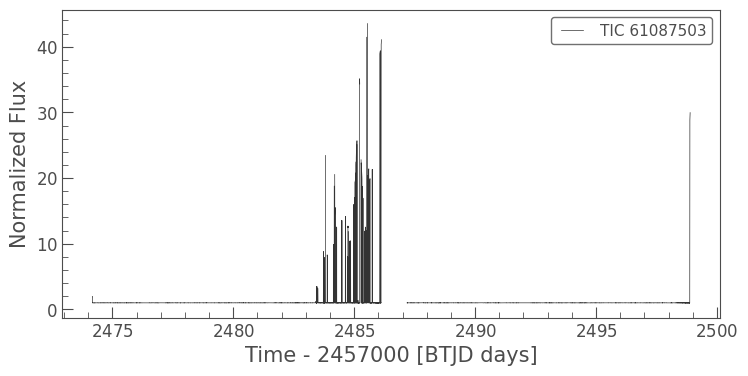

In [7]:
flat_lc = find_spikes(tpf)

Detected Period: 0.5047504750475047 d
Transit Time (Epoch): 2474.315767776337
Duration: 0.25 d


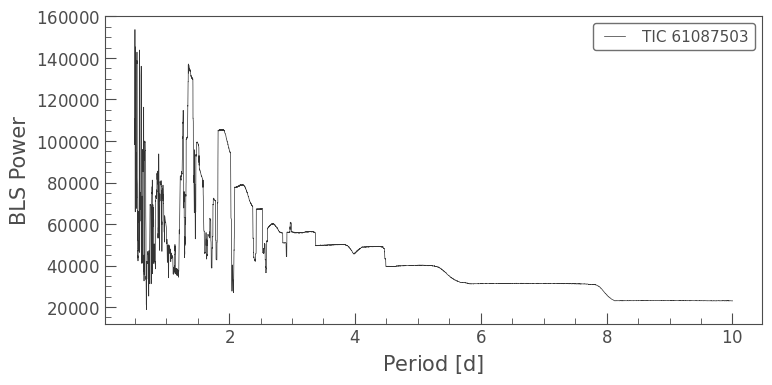

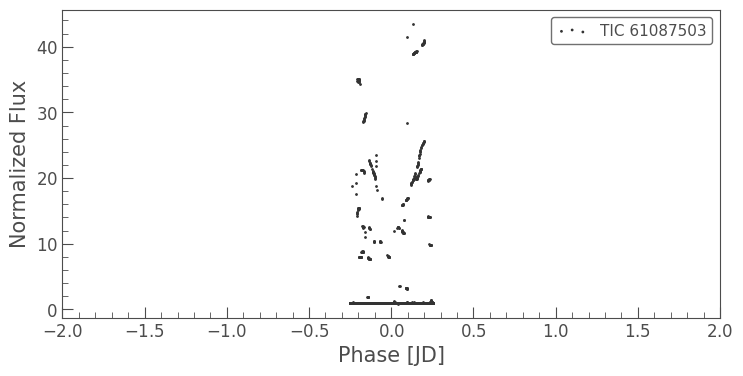

In [8]:
bls = look_for_planet(flat_lc, 0.5, 10)

In [9]:
def show_folded_curves(bls):
    top_periods = bls.period[np.argsort(bls.power)[-5:]]
    print(f"Top Periods: {top_periods}")
    
    # Fold light curve for the top periods to inspect each visually
    for period in top_periods:
        folded_lc = flat_lc.fold(period=period, epoch_time=planet_x_t0)
        ax = folded_lc.scatter()
        ax.set_xlim(-2, 2)
        plt.title(f'Folded Light Curve for Period: {period}')
        plt.show()

Top Periods: [0.51425143 0.57505751 0.51330133 0.50380038 0.50475048] d


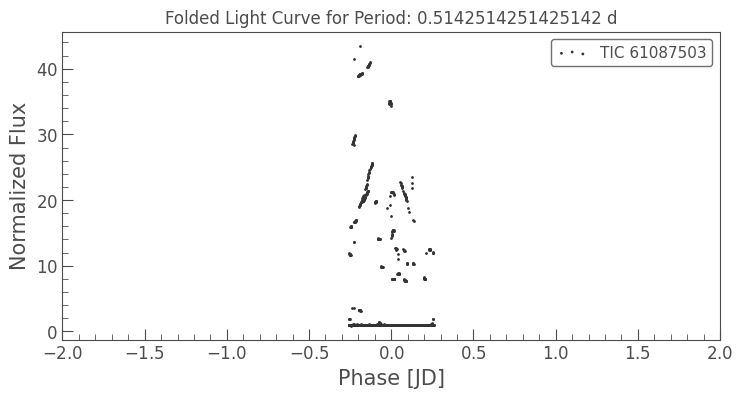

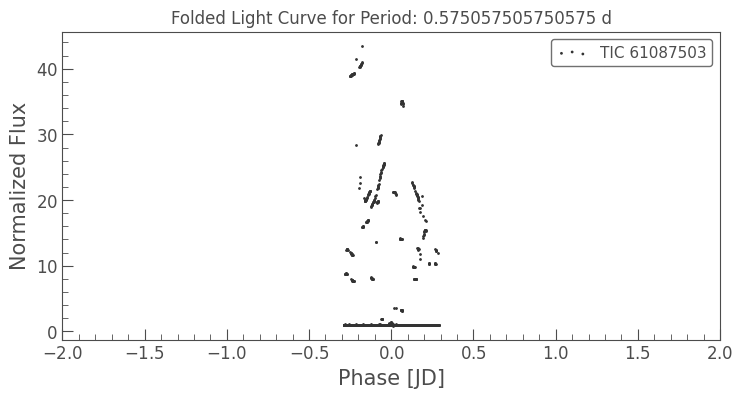

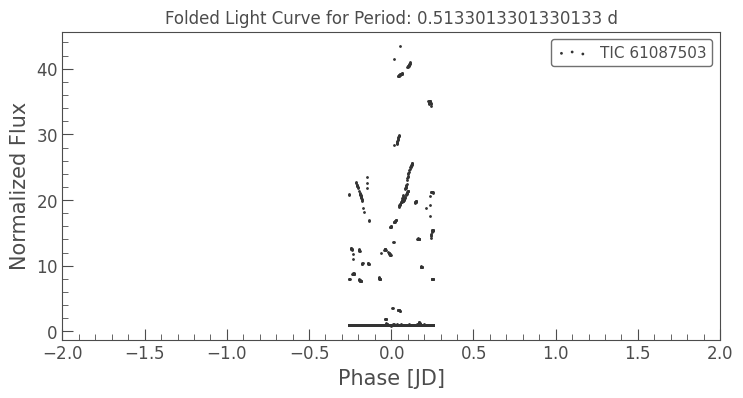

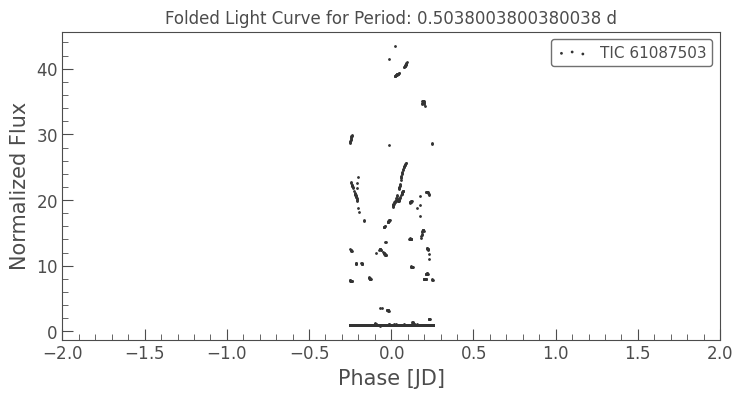

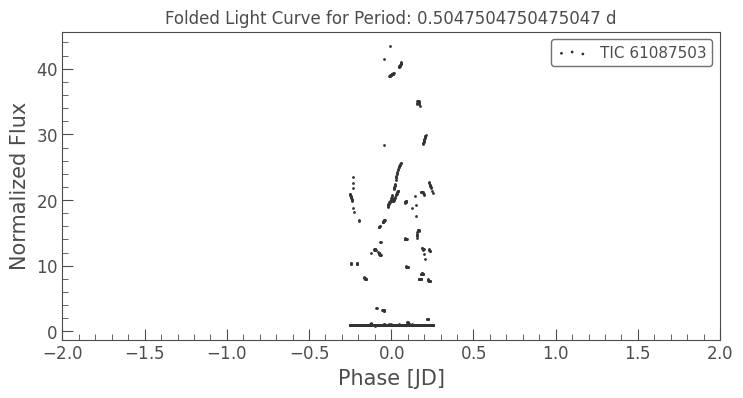

In [10]:
show_folded_curves(bls)

#### Conclusion: This anomaly appears to just be stellar noise, lets move on to an example of another star

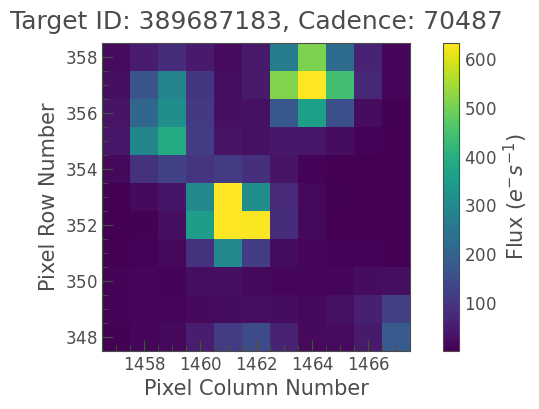

In [11]:
tpf = TessTargetPixelFile('TESS/MAST_2024-06-03T1504/TESS/tess2018206045859-s0001-0000000389687183-0120-s/tess2018206045859-s0001-0000000389687183-0120-s_tp.fits')
tpf.plot(frame=42)
plt.show()

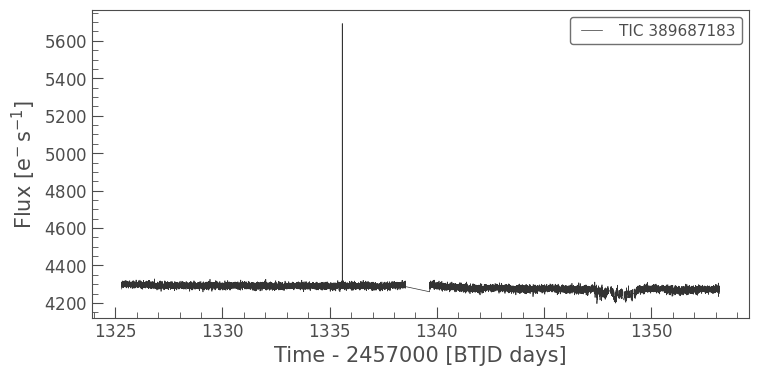

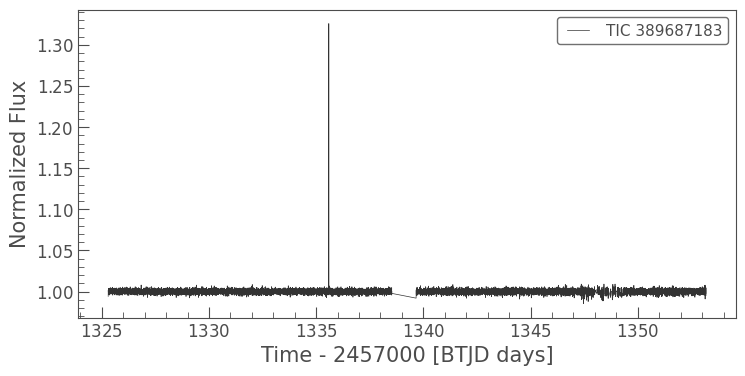

In [12]:
flat_lc = find_spikes(tpf)

Detected Period: 0.519001900190019 d
Transit Time (Epoch): 1325.505810700635
Duration: 0.33 d


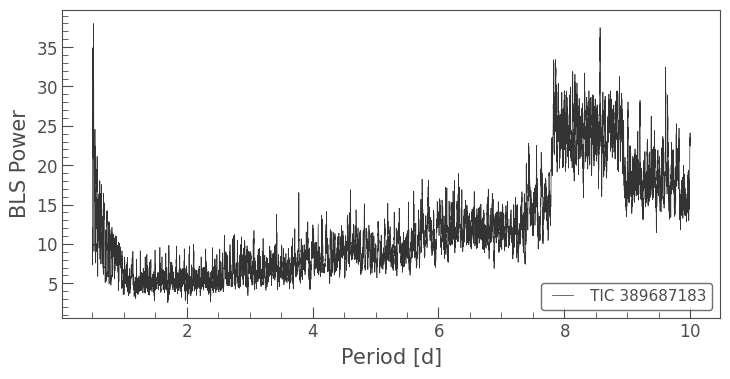

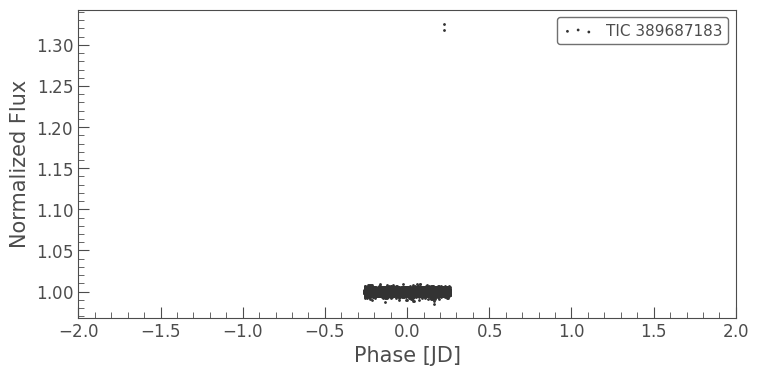

In [13]:
bls = look_for_planet(flat_lc, 0.5, 10)

Top Periods: [0.50855086 8.57010701 8.56725673 8.56915692 0.5190019 ] d


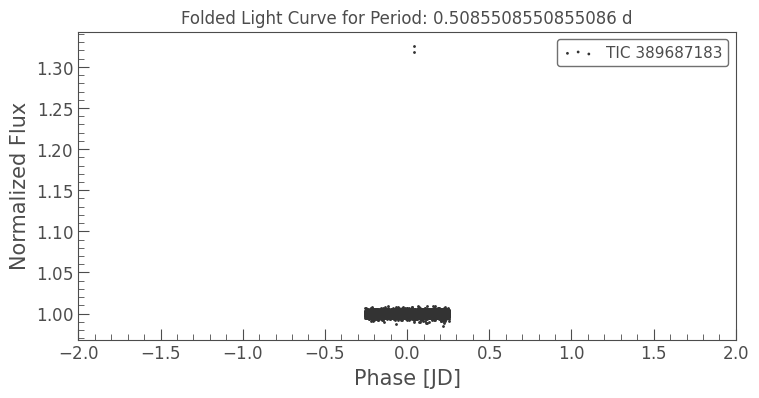

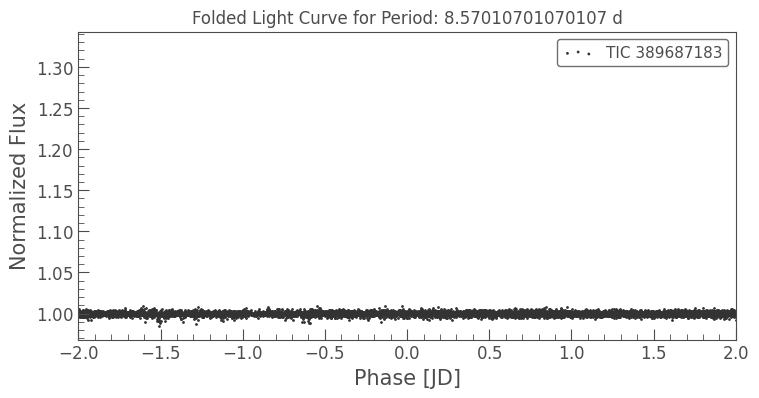

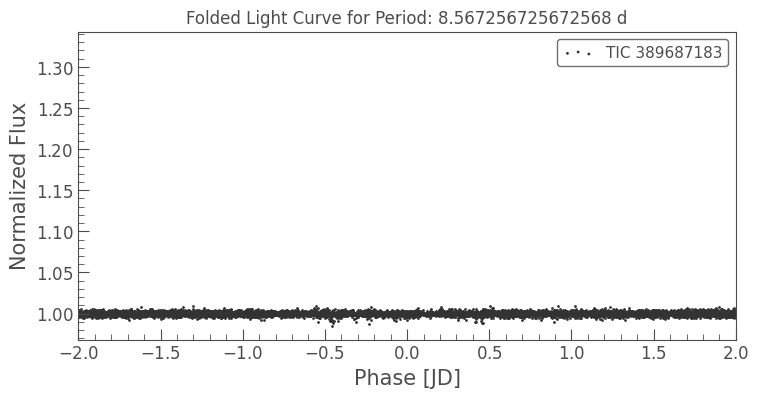

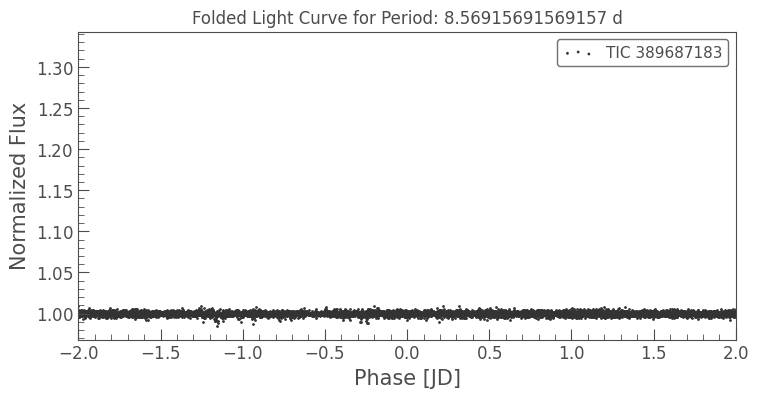

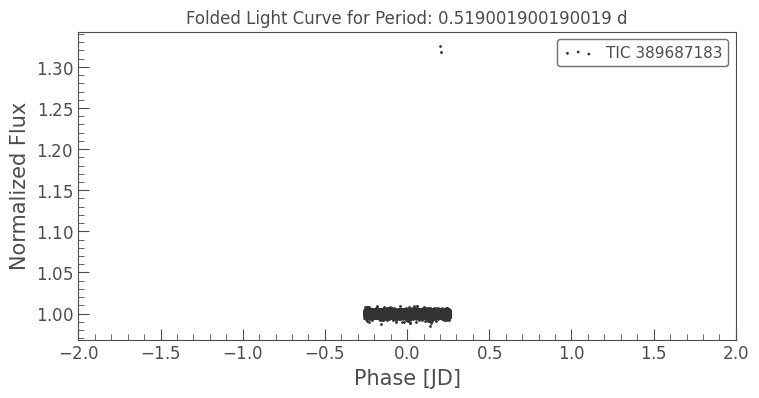

In [14]:
show_folded_curves(bls)

#### Nothing of note on this star